In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
cleaned_star_data_ds = pd.read_csv("/content/drive/MyDrive/Clasificación_supervisada/cleaned_star_data.csv")

In [ ]:
cleaned_star_data_ds

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3042,0.0005,0.1542,16.6,0.0,Red,M
2,2600,0.0003,0.102,18.7,0.0,Red,M
3,2800,0.0002,,16.65,0.0,Red,M
4,1939,0.000138,0.103,20.06,0.0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830,1356,-9.93,5.0,Blue,O
236,30839,834042,1194,-10.63,5.0,Blue,O
237,8829,537493,1423,-10.73,5.0,White,A
238,9235,404940,1112,-11.23,5.0,White,A


In [ ]:
cleaned_star_data_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         239 non-null    object 
 1   Luminosity(L/Lo)        239 non-null    object 
 2   Radius(R/Ro)            239 non-null    object 
 3   Absolute magnitude(Mv)  239 non-null    object 
 4   Star type               239 non-null    float64
 5   Star color              239 non-null    object 
 6   Spectral Class          239 non-null    object 
dtypes: float64(1), object(6)
memory usage: 13.2+ KB


In [ ]:
cleaned_star_data_ds.columns

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')

In [ ]:
import seaborn as sns

In [ ]:
print(cleaned_star_data_ds['Temperature (K)'].unique())

[nan '3042' '2600' '2800' '1939' '2840' '2637' '2650' '2700' '3600' '3129'
 '3134' '3628' '3340' '2799' '3692' '3192' '3441' '25000' '7740' '7220'
 '8500' '16500' '12990' '8570' '7700' '11790' '7230' '39000' '30000'
 '15276' '9700' '5800' '8052' '6757' '6380' '5936' '5587' '3826' '3365'
 '3270' '3200' '3008' '3575' '3574' '3625' '33750' '3490' '3750' '3834'
 '3749' '3650' '3450' '3660' '3752' '3535' '3341' '3432' '2983' '2835'
 '2935' '3295' '2945' '2817' '2774' '2871' '3345' '3607' '3304' '3150'
 '3550' '3180' '2890' '3342' '2621' '3158' '7100' '10574' '8930' '17200'
 '14100' '9675' '12010' '10980' '13720' '19860' '5300' '4526' '4077'
 '4980' '9030' '11250' '5112' '7720' '12098' '36108' '33300' '40000'
 '23000' '17120' '11096' '14245' '24630' '12893' '24345' '33421' '3459'
 '3605' '3615' '3399' ' ' '3553' '4015' '6850' '3780' '3323' '3531' '3218'
 '3146' '3511' '3225' '2861' '2856' '2731' '3095' '3100' '2989' '3542'
 '3243' '3091' '3598' '3324' '3541' '13420' '18290' '14520' '11900' '

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<Axes: >

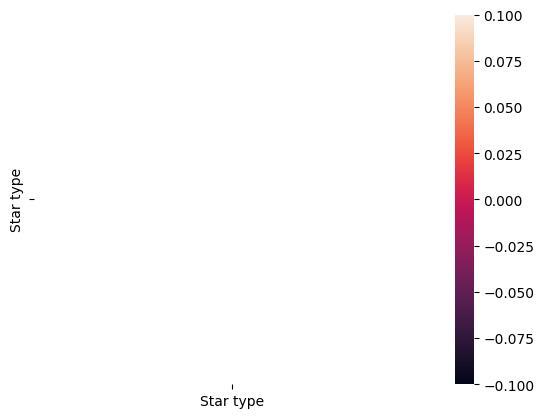

In [ ]:
star_ds_numeric = cleaned_star_data_ds.select_dtypes(include=[float, int])
corr_mat = star_ds_numeric.corr()
sns.heatmap(corr_mat.corr())

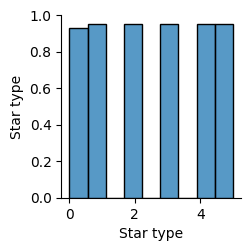

In [ ]:
sns.pairplot(cleaned_star_data_ds)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
cleaned_star_data_ds = cleaned_star_data_ds.dropna(subset=['Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)'])

In [ ]:
pca = PCA (2)

In [ ]:
# Reemplazar espacios en blanco o valores vacíos con NaN
cleaned_star_data_ds[['Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Temperature (K)']] = cleaned_star_data_ds[['Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Temperature (K)']].replace(' ', np.nan)

# Eliminar filas con valores faltantes
cleaned_star_data_ds.dropna(subset=['Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Temperature (K)'], inplace=True)

# Asegurar que las columnas son numéricas
cleaned_star_data_ds[['Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Temperature (K)']] = cleaned_star_data_ds[['Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Temperature (K)']].astype(float)

# Aplicar PCA
res = pca.fit_transform(cleaned_star_data_ds[['Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Temperature (K)']])
cleaned_star_data_ds['x'] = res[:, 0]
cleaned_star_data_ds['y'] = res[:, 1]

# Ver el DataFrame
cleaned_star_data_ds


<ipython-input-14-b3f0161a644f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_star_data_ds[['Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Temperature (K)']] = cleaned_star_data_ds[['Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Temperature (K)']].replace(' ', np.nan)
<ipython-input-14-b3f0161a644f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_star_data_ds.dropna(subset=['Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Temperature (K)'], inplace=True)
<ipython-input-14-b3f0161a644f>:8: SettingWi

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class,x,y
1,3042.0,0.000500,0.1542,16.60,0.0,Red,M,-107647.441872,-5281.421888
2,2600.0,0.000300,0.1020,18.70,0.0,Red,M,-107657.009157,-5723.303585
4,1939.0,0.000138,0.1030,20.06,0.0,Red,M,-107671.316465,-6384.126931
6,2637.0,0.000730,0.1270,17.22,0.0,Red,M,-107656.207779,-5686.313383
7,2600.0,0.000400,0.0960,17.40,0.0,Red,M,-107657.009015,-5723.303255
...,...,...,...,...,...,...,...,...,...
235,38940.0,374830.000000,1356.0000,-9.93,5.0,Blue,O,267873.382956,22487.769123
236,30839.0,834042.000000,1194.0000,-10.63,5.0,Blue,O,726801.670535,4456.897091
237,8829.0,537493.000000,1423.0000,-10.73,5.0,White,A,429846.445761,-11134.338316
238,9235.0,404940.000000,1112.0000,-11.23,5.0,White,A,297332.966071,-7858.595072


In [ ]:
res = pca.fit_transform(cleaned_star_data_ds[['Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)','Temperature (K)']])

In [ ]:
from sklearn.impute import SimpleImputer

# Create an imputer with the mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the data to fill in missing values
cleaned_values = imputer.fit_transform(cleaned_star_data_ds[['Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']])

# Now you can apply PCA
res = pca.fit_transform(cleaned_values)
cleaned_star_data_ds['x'] = res[:, 0]
cleaned_star_data_ds['y'] = res[:, 1]
cleaned_star_data_ds

<ipython-input-16-2e91c55d3232>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_star_data_ds['x'] = res[:, 0]
<ipython-input-16-2e91c55d3232>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_star_data_ds['y'] = res[:, 1]


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class,x,y
1,3042.0,0.000500,0.1542,16.60,0.0,Red,M,-107507.892782,-68.732357
2,2600.0,0.000300,0.1020,18.70,0.0,Red,M,-107507.893145,-68.798670
4,1939.0,0.000138,0.1030,20.06,0.0,Red,M,-107507.893359,-68.806810
6,2637.0,0.000730,0.1270,17.22,0.0,Red,M,-107507.892618,-68.763724
7,2600.0,0.000400,0.0960,17.40,0.0,Red,M,-107507.893003,-68.795933
...,...,...,...,...,...,...,...,...,...
235,38940.0,374830.000000,1356.0000,-9.93,5.0,Blue,O,267323.746458,712.119361
236,30839.0,834042.000000,1194.0000,-10.63,5.0,Blue,O,726534.957171,-154.488228
237,8829.0,537493.000000,1423.0000,-10.73,5.0,White,A,429986.657723,529.532595
238,9235.0,404940.000000,1112.0000,-11.23,5.0,White,A,297433.336713,421.933031


In [ ]:
res = pca.fit_transform(cleaned_values)


<Axes: xlabel='x', ylabel='y'>

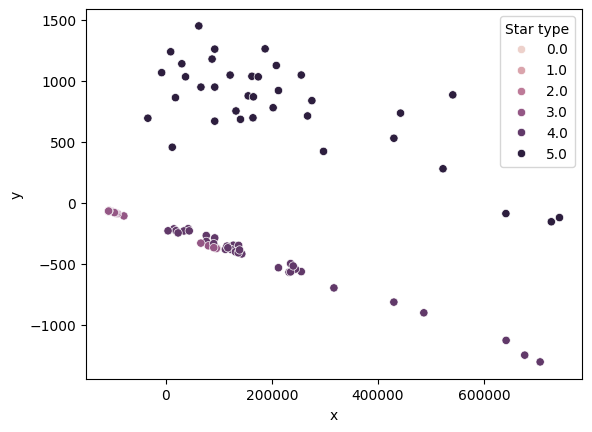

In [ ]:
sns.scatterplot(data=cleaned_star_data_ds, x='x', y='y', hue='Star type')


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
star_x = cleaned_star_data_ds[['Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']]
star_x

,Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
1,0.000500,0.1542,16.60
2,0.000300,0.1020,18.70
4,0.000138,0.1030,20.06
6,0.000730,0.1270,17.22
7,0.000400,0.0960,17.40
...,...,...,...
235,374830.000000,1356.0000,-9.93
236,834042.000000,1194.0000,-10.63
237,537493.000000,1423.0000,-10.73
238,404940.000000,1112.0000,-11.23


In [ ]:
star_y = cleaned_star_data_ds['Star type']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split (star_x, star_y, test_size=0.2, random_state=123)

In [ ]:
x_test

,Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
206,0.001590,0.01270,10.550
231,272830.000000,1356.00000,-9.290
83,0.000980,0.01500,12.450
25,0.000085,0.00984,12.230
92,0.085000,0.79500,6.228
197,0.001250,0.33600,14.940
219,9.250000,1.93000,-0.980
183,0.000452,0.09870,17.340
229,748890.000000,92.00000,-7.346
104,112000.000000,12.00000,-5.910


In [ ]:
from  sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn5 = KNeighborsClassifier(n_neighbors=5, metric='manhattan')

In [ ]:
knn5.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan')

In [ ]:
knn5pred = knn5.predict(x_test)

In [ ]:
x_test

,Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
206,0.001590,0.01270,10.550
231,272830.000000,1356.00000,-9.290
83,0.000980,0.01500,12.450
25,0.000085,0.00984,12.230
92,0.085000,0.79500,6.228
197,0.001250,0.33600,14.940
219,9.250000,1.93000,-0.980
183,0.000452,0.09870,17.340
229,748890.000000,92.00000,-7.346
104,112000.000000,12.00000,-5.910


In [ ]:
knn5pred

array([1., 5., 2., 1., 3., 2., 3., 0., 5., 5., 4., 4., 2., 1., 0., 4., 1.,
       1., 0., 1., 1., 3., 0., 5., 1., 3., 3., 4., 4., 3., 0., 4., 3., 2.,
       2., 0., 5., 3., 5., 2., 2., 1., 0., 3.])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, knn5pred)

array([[7, 0, 0, 0, 0, 0],
       [0, 3, 1, 0, 0, 0],
       [0, 6, 6, 0, 0, 0],
       [0, 0, 0, 9, 0, 0],
       [0, 0, 0, 0, 5, 4],
       [0, 0, 0, 0, 1, 2]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, knn5pred)

0.7272727272727273

In [ ]:
for k in range(1,50,2):
  knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
  knn.fit(x_train,y_train)
  knnpred = knn.predict(x_test)
  acc=accuracy_score(y_test, knnpred)
  print(f'K={k}\tAccuracy={acc}')

K=1	Accuracy=0.8636363636363636
K=3	Accuracy=0.8181818181818182
K=5	Accuracy=0.7272727272727273
K=7	Accuracy=0.75
K=9	Accuracy=0.7954545454545454
K=11	Accuracy=0.75
K=13	Accuracy=0.6590909090909091
K=15	Accuracy=0.5681818181818182
K=17	Accuracy=0.5909090909090909
K=19	Accuracy=0.6136363636363636
K=21	Accuracy=0.6363636363636364
K=23	Accuracy=0.5909090909090909
K=25	Accuracy=0.5681818181818182
K=27	Accuracy=0.5454545454545454
K=29	Accuracy=0.5454545454545454
K=31	Accuracy=0.5454545454545454
K=33	Accuracy=0.5
K=35	Accuracy=0.4772727272727273
K=37	Accuracy=0.4090909090909091
K=39	Accuracy=0.38636363636363635
K=41	Accuracy=0.36363636363636365
K=43	Accuracy=0.38636363636363635
K=45	Accuracy=0.38636363636363635
K=47	Accuracy=0.3181818181818182
K=49	Accuracy=0.36363636363636365


In [ ]:
knn5 = KNeighborsClassifier(n_neighbors=9, metric='manhattan')
knn5.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

In [ ]:
# Solicitar al usuario los datos
luminosity = float(input("Ingresa la luminosidad (Luminosity(L/Lo)): "))
radius = float(input("Ingresa el radio (Radius(R/Ro)): "))
absolute_magnitude = float(input("Ingresa la magnitud absoluta (Absolute magnitude(Mv)): "))





Ingresa la luminosidad (Luminosity(L/Lo)): 13143
Ingresa el radio (Radius(R/Ro)): 13
Ingresa la magnitud absoluta (Absolute magnitude(Mv)): 3131


In [ ]:
# Crear el DataFrame con los nuevos valores de luminosidad, radio y magnitud absoluta
x_test = pd.DataFrame([[luminosity, radius, absolute_magnitude]],
                      columns=['Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)'])

# Predecir con el modelo k-NN
prediction = knn.predict(x_test)

# Mostrar el DataFrame
x_test


,Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
0,13143.0,13.0,3131.0


In [ ]:
knn5pred = knn5.predict(x_test)
knn5pred


array([3.])